# Лабораторная работа по ИАД №1

### Тема:   Уменьшение объема данных. Свёрточные методы отбора признаков


Светочные методы отбора признаков -- это автоматизированные методы, используемые в машинном обучении, основанные на применении свёрточных операций, которые позволяют выделять значимые признаки из данных без необходимости их ручного создания или предварительного задания.

Эти методы отличаются от традиционных подходов к отбору признаков тем, что они обучаются на данных для выявления наиболее информативных характеристик, таких как границы объектов, текстуры и формы, вместо того чтобы полагаться на заранее определённые правила или экспертные знания

__Основные свёрточные методы:__
- Recursive Feature Elimination (RFE)
- Sequential Feature Selection (SFS)
- Генетические алгоритмы
- Exhaustive Feature Selection (EFS)
- Simulated Annealing

## Задание №1: Рекурсивное исключение признаков (RFE)

#### Условие: Используйте набор данных "Iris" из sklearn.datasets. Примените метод RFE с использованием модели логистической регрессии. Укажите количество признаков для выбора и сравните производительность модели с и без этих признаков.

Recursive Feature Elimination (RFE) — это метод отбора признаков, который работает итеративно, последовательно удаляя наименее важные признаки до тех пор, пока не останется заданное количество наиболее значимых.

Как работает RFE:
- На первом этапе строится модель машинного обучения с использованием всех доступных признаков.
- После обучения определяется важность каждого признака. Это может быть сделано, например, через коэффициенты модели (например, в случае линейной регрессии или SVM).
- Признаки с наименьшей важностью исключаются из набора данных.
- Оставшиеся признаки снова используются для обучения модели, и процесс повторяется до тех пор, пока не будет достигнуто желаемое количество признаков или критерий остановки 4.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
iris = load_iris()
x, y = iris.data, iris.target

In [4]:
df = pd.DataFrame(x, columns=iris.feature_names)
df['target'] = y

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


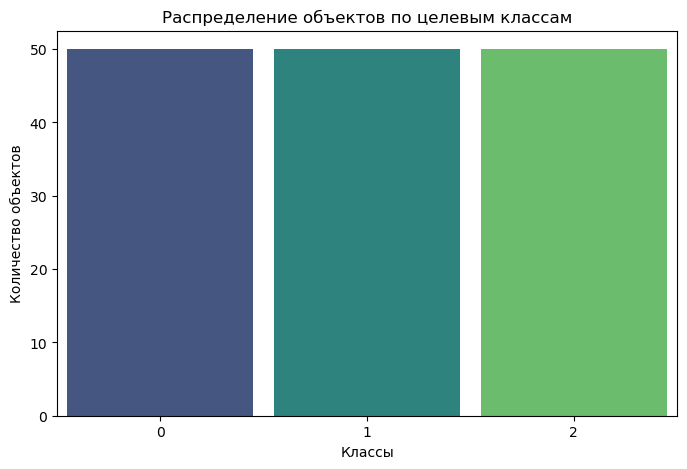

In [6]:
class_distribution = df['target'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')

In [9]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, multi_class='auto')

In [10]:
y_pred_full = model.predict(x_test)

In [11]:
print("Before RFE:")
print(classification_report(y_test, y_pred_full, target_names=iris.target_names))

Before RFE:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
rfe = RFE(model, n_features_to_select=2)
x_rfe = rfe.fit_transform(x, y)

In [13]:
selected_features = np.array(iris.feature_names)[rfe.support_]
removed_features = np.array(iris.feature_names)[~rfe.support_]

print(f"\nВыбранные признаки: {selected_features}")
print(f"Удаленные признаки: {removed_features}")


Выбранные признаки: ['petal length (cm)' 'petal width (cm)']
Удаленные признаки: ['sepal length (cm)' 'sepal width (cm)']


In [14]:
x_rfe = rfe.transform(x)
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe, y, test_size=0.2, random_state=0)

In [15]:
model.fit(x_train_rfe, y_train_rfe)

LogisticRegression(max_iter=200, multi_class='auto')

In [16]:
y_pred_rfe = model.predict(x_test_rfe)

In [17]:
print("\nClassification Report (с RFE, 2 признака):")
print(classification_report(y_test_rfe, y_pred_rfe, target_names=iris.target_names))


Classification Report (с RFE, 2 признака):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Метрики модели незначительно ухудшаются при удалении менее важных признаков, однако за счёт этого модель значительно лучше улавливает закономерности и расходуит значительно меньше ресурсов и при обучении, и при эксплуатации.

## Задание №2: Sequential Feature Selector

#### Условие: Используйте набор данных "Boston Housing" из sklearn.datasets. Используйте Sequential Feature Selector для выбора признаков с использованием модели Random Forest. Визуализируйте "важность" признаков.

Sequential Feature Selector (SFS) — это метод отбора признаков, который последовательно добавляет или удаляет признаки из набора данных с целью улучшения производительности модели.

Как работает SFS:
- Процесс начинается либо с пустого набора признаков (в случае прямого отбора, forward selection), либо со всеми доступными признаками (в случае обратного исключения, backward elimination).
- В прямом отборе на каждом шаге добавляется один признак, который наиболее сильно улучшает производительность модели. В обратном исключении на каждом шаге удаляется наименее важный признак, который минимально влияет на качество модели.
- После каждого изменения набора признаков модель обучается заново, и её производительность оценивается на основе заданного критерия (например, точности или ошибки).
- Процесс продолжается до тех пор, пока не будет достигнуто желаемое количество признаков или не выполнится условие остановки.

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [21]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
x = df.drop(columns=['medv'])
y = df['medv']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [26]:
sfs = SequentialFeatureSelector(
    rf_model,
    n_features_to_select=5,
    direction='forward',
    scoring='neg_mean_squared_error',
    cv=5
)

In [27]:
sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=RandomForestRegressor(n_estimators=10,
                                                          random_state=0),
                          n_features_to_select=5,
                          scoring='neg_mean_squared_error')

In [28]:
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [29]:
selected_features = np.array(x.columns)[sfs.support_]

In [30]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [31]:
rf_model.fit(x_train_sfs, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [32]:
y_pred_sfs = rf_model.predict(x_test_sfs)
mse_sfs = mean_squared_error(y_test, y_pred_sfs)

In [33]:
print("MSE: ", mse)
print("MSE after sfs: ", mse_sfs)

MSE:  20.970217647058828
MSE after sfs:  27.754087254901968


In [34]:
feature_importances = rf_model.feature_importances_

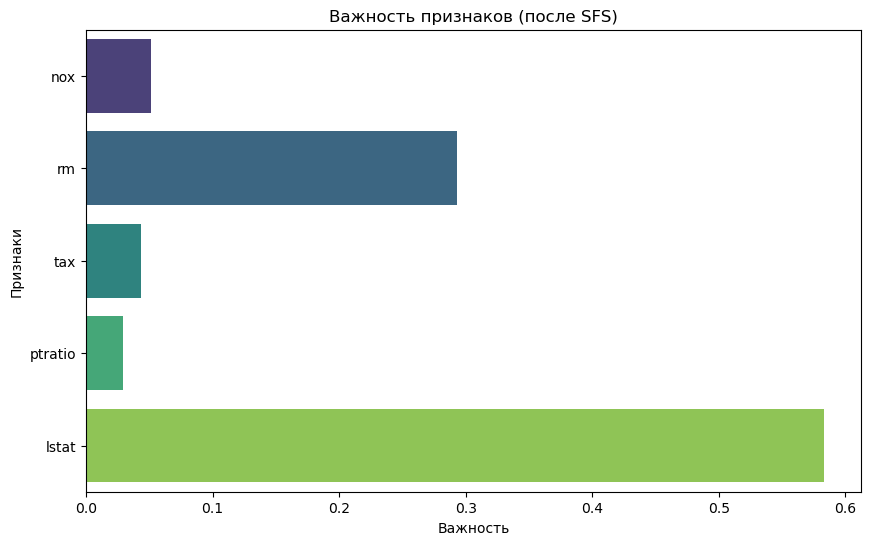

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=selected_features, palette='viridis')
plt.title('Важность признаков (после SFS)')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

## Задание №3: Использование метода-обертки при кросс-валидации

#### Условие: Используйте любой набор данных на ваше усмотрение. Выберите модель машинного обучения и метод-обертку для отбора признаков. Примените кросс-валидацию, чтобы оценить эффективность этого подхода.

Кросс-валидация — метод, который разбивает данные на несколько частей (folds), где одна часть используется для тестирования, а остальные — для обучения. Это позволяет оценить, насколько хорошо модель будет работать на новых данных, что особенно важно при отборе признаков.

Методы-обертки, такие как RFE или SFS, последовательно добавляют или удаляют признаки, оценивая их влияние на качество модели. Кросс-валидация обеспечивает надежную оценку каждого подмножества, так как модель тестируется на нескольких независимых выборках.

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url)

In [39]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [40]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

In [41]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


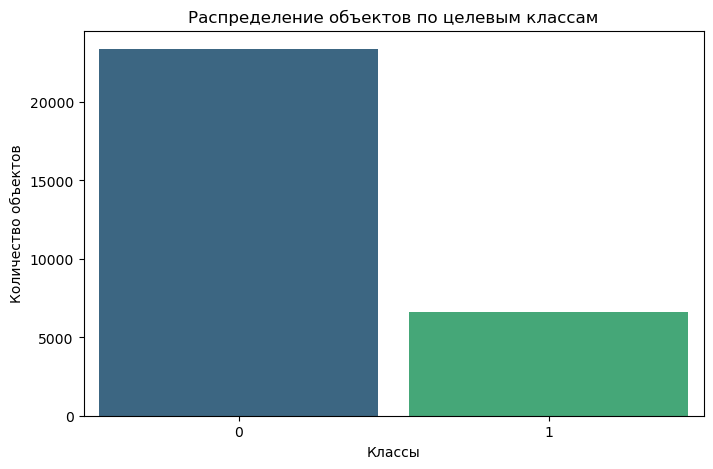

In [42]:
class_distribution = df['default payment next month'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [43]:
x = df.drop(columns=['default payment next month'])
y = df['default payment next month']
y = y.round().astype(int)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [46]:
model = RandomForestClassifier(n_estimators=10, random_state=0)

In [47]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [48]:
y_pred = model.predict(x_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.63      0.33      0.43      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [50]:
rfe = RFE(estimator=model, n_features_to_select=5)
x_train_rfe = rfe.fit_transform(x_train, y_train)
x_test_rfe = rfe.transform(x_test)

In [51]:
model.fit(x_train_rfe, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [52]:
cv_scores = cross_val_score(model, x_train_rfe, y_train, cv=5, scoring='accuracy')
print(f"Средняя точность на кросс-валидации: {cv_scores.mean():.4f}")

Средняя точность на кросс-валидации: 0.7995


In [53]:
y_pred = model.predict(x_test_rfe)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4703
           1       0.59      0.32      0.41      1297

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



## Задание №4: Сравнение методов-оберток

#### Условие: Используйте один и тот же набор данных для применения различных методов-оберток для отбора признаков, например, RFE и Sequential Feature Selector, и сравните полученные результаты.

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [57]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(url)

In [58]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [59]:
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

In [60]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


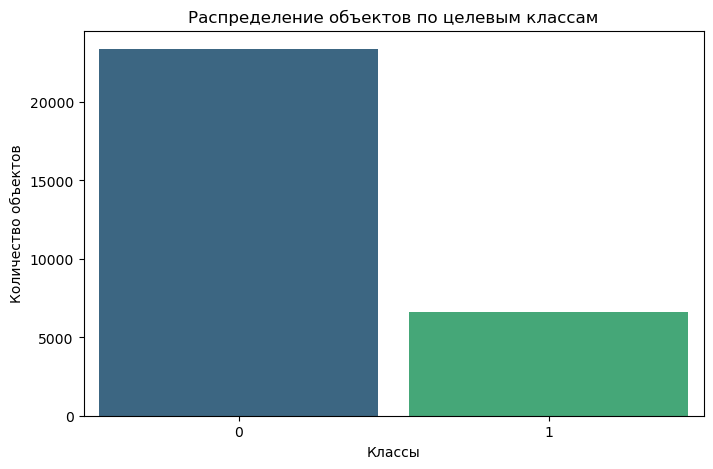

In [61]:
class_distribution = df['default payment next month'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [62]:
x = df.drop(columns=['default payment next month'])
y = df['default payment next month']
y = y.round().astype(int)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [65]:
model = RandomForestClassifier(n_estimators=10, random_state=0)

In [66]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [67]:
y_pred = model.predict(x_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.63      0.33      0.43      1297

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [69]:
rfe = RFE(estimator=model, n_features_to_select=6)
x_train_rfe = rfe.fit_transform(x_train, y_train)
x_test_rfe = rfe.transform(x_test)

In [70]:
model.fit(x_train_rfe, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [71]:
y_pred = model.predict(x_test_rfe)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4703
           1       0.61      0.34      0.44      1297

    accuracy                           0.81      6000
   macro avg       0.72      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [73]:
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=6, direction='forward', scoring='accuracy', cv=5)
x_train_sfs = sfs.fit_transform(X_train, y_train)
x_test_sfs = sfs.transform(x_test)

In [74]:
model.fit(x_train_sfs, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [75]:
y_pred = model.predict(x_test_sfs)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4703
           1       0.52      0.28      0.36      1297

    accuracy                           0.79      6000
   macro avg       0.67      0.60      0.62      6000
weighted avg       0.76      0.79      0.76      6000



## Задание №5: Анализ предсказательной способности признаков

#### Условие: Используйте набор данных "Wine" из sklearn.datasets. Выберите модель машинного обучения и метод-обертку для отбора признаков и исследуйте, как влияет отбор признаков на предсказательную способность модели.

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [79]:
wine = load_wine()
x, y = wine.data, wine.target

In [80]:
df = pd.DataFrame(x, columns=wine.feature_names)
df['target'] = y

In [81]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


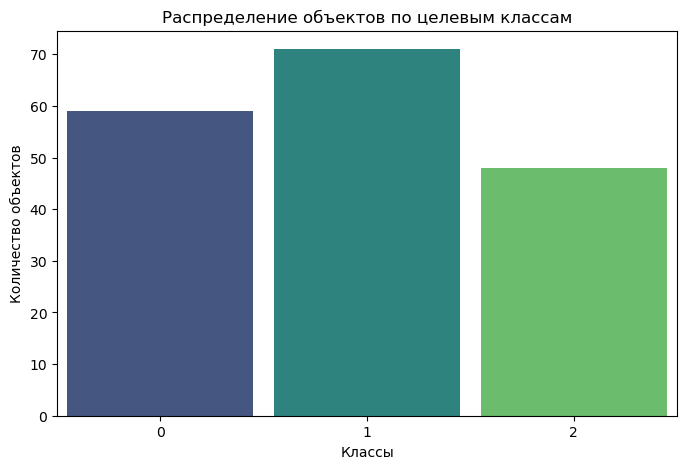

In [82]:
class_distribution = df['target'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis', width=0.9)
plt.title('Распределение объектов по целевым классам')
plt.xlabel('Классы')
plt.ylabel('Количество объектов')
plt.show()

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [84]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=0)

In [85]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [86]:
y_pred_full = rf_model.predict(x_test)

In [87]:
print(classification_report(y_test, y_pred_full, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.94      0.97        16
     class_2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [88]:
feature_importances = rf_model.feature_importances_

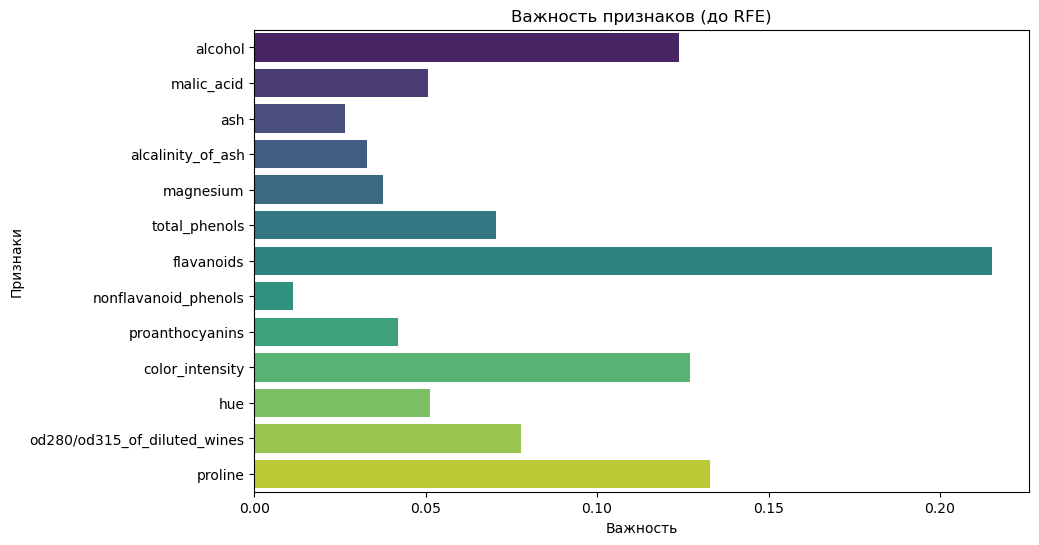

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=wine.feature_names, palette='viridis')
plt.title('Важность признаков (до RFE)')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

In [90]:
rfe = RFE(estimator=rf_model, n_features_to_select=5)

In [91]:
x_rfe = rfe.fit_transform(x, y)

In [92]:
selected_features = np.array(wine.feature_names)[rfe.support_]
removed_features = np.array(wine.feature_names)[~rfe.support_]

In [93]:
print(f"Выбранные признаки: {selected_features}")
print(f"Удаленные признаки: {removed_features}")

Выбранные признаки: ['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']
Удаленные признаки: ['malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium' 'total_phenols'
 'nonflavanoid_phenols' 'proanthocyanins' 'hue']


In [94]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe, y, test_size=0.2, random_state=0)

In [95]:
rf_model.fit(X_train_rfe, y_train_rfe)

RandomForestClassifier(n_estimators=10, random_state=0)

In [96]:
y_pred_rfe = rf_model.predict(X_test_rfe)

In [97]:
print(classification_report(y_test_rfe, y_pred_rfe, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.88      0.93        16
     class_2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [98]:
feature_importances = rf_model.feature_importances_

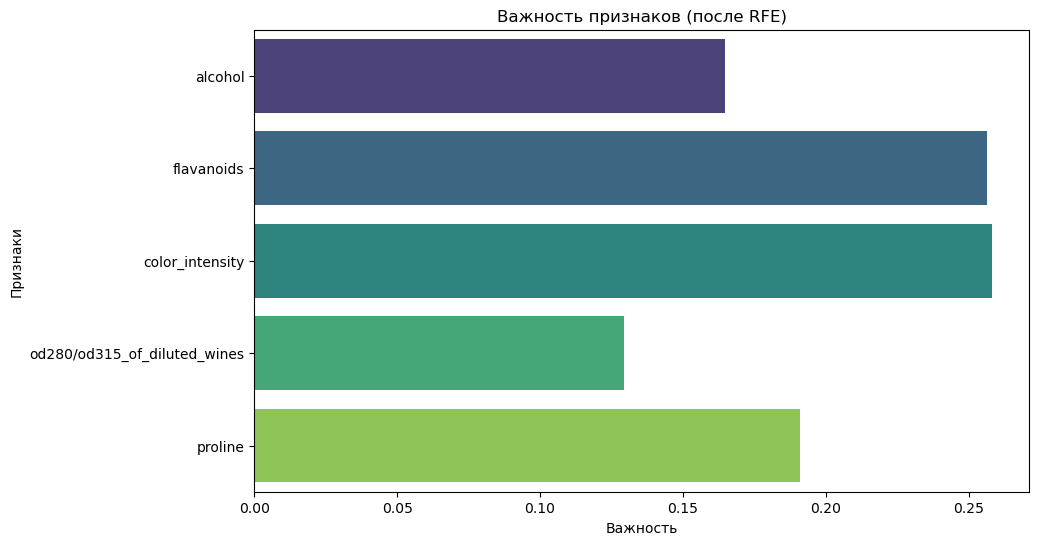

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=selected_features, palette='viridis')
plt.title('Важность признаков (после RFE)')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

## Вывод:

Методы для отбора признаков позволяют выделить для модели наиболее важные закономерности, за счёт чего уменьшается обрабатываемый объем данных, а также повышается устойчивость модели за счёт небольшого уменьшения точности. На рассмотренных примерах обёрточный метод RFE показал более хорошие показатели чем SFS (Он сохранил больше точности на отборе одинакового количества признаков).

## Список использованных материалов:

- https://education.yandex.ru/handbook/ml
- https://scikit-learn.org/stable/user_guide.html
- https://habr.com/ru/companies/jetinfosystems/articles/470622/
- https://medium.com/@tzhaonj/feature-selection-in-machine-learning-recursive-feature-elimination-vs-235faddc1604
- https://proglib.io/p/postroenie-i-otbor-priznakov-chast-2-feature-selection-2021-09-25